<a href="https://colab.research.google.com/github/Nilachandana-S8/Heart-Disease-Detection/blob/main/newHEART_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# New Section

Data collection and processing

In [ ]:
# loading the csv data to a pandas dataframe
heart_data=pd.read_csv("/content/data.csv")

In [ ]:
#print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
#number of rows and columns of the dataset
heart_data.shape

(1025, 14)

In [ ]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# statistical measures of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#checking the distribution of targeted variables
heart_data["target"].value_counts()

,count
target,
1,526
0,499


1......> DEFECTIVE HEART
0......> HEALTHY HEART


Spiting the features and target


In [ ]:
X=heart_data.drop(columns="target",axis=1)
Y=heart_data["target"]

In [ ]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal
0      52    1   0       125   212    0        1      168      0      1.0      2   2     3
1      53    1   0       140   203    1        0      155      1      3.1      0   0     3
2      70    1   0       145   174    0        1      125      1      2.6      0   0     3
3      61    1   0       148   203    0        1      161      0      0.0      2   1     3
4      62    0   0       138   294    1        1      106      0      1.9      1   3     2
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...    ...  ..   ...
1020   59    1   1       140   221    0        1      164      1      0.0      2   0     2
1021   60    1   0       125   258    0        0      141      1      2.8      1   1     3
1022   47    1   0       110   275    0        0      118      1      1.0      1   1     2
1023   50    0   0       110   254    0        0      159      0      0.0      2   0     2

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Spitting the data into **Traning** and **Test** DATA  

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1025, 13) (820, 13) (205, 13)


model Traning

Logistic Regression

In [ ]:
model=LogisticRegression()

In [ ]:
#traning the LogisticRegression model traning data
model.fit(X_train,Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evluation

Accuracy Score

In [ ]:
# accuracy on traning data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print("Accuracy on Traning data :",training_data_accuracy)

Accuracy on Traning data : 0.8524390243902439


In [ ]:
# accuracy on traning data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print("Accuracy on Test data :",test_data_accuracy)

Accuracy on Test data : 0.8048780487804879


confusion matric

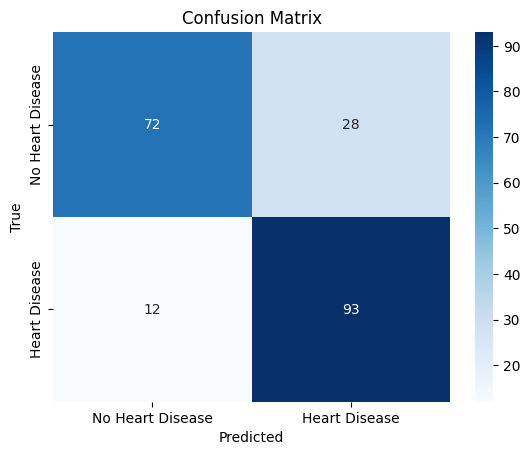

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Precision, Recall, and F1-Score

In [ ]:
from sklearn.metrics import classification_report

# Print detailed metrics like precision, recall, and F1-score
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.72      0.78       100
           1       0.77      0.89      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



Try Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')

# Print average cross-validation accuracy
print(f"Average Cross-Validation Accuracy: {cv_scores.mean():.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Average Cross-Validation Accuracy: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameters for tuning
param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}

# Initialize GridSearchCV with Logistic Regression
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fit grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Get the best model
best_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}


 Feature Importance or Selection

In [ ]:
# Get feature importance based on the model coefficients
coefficients = model.coef_[0]
feature_names = heart_data.columns[:-1]

# Display feature names and their importance
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")


age: 0.0037872851460813714
sex: -1.488280351501482
cp: 0.802212494944052
trestbps: -0.01120690779574774
chol: -0.0037268880488239976
fbs: -0.049493086820358814
restecg: 0.4355272913474797
thalach: 0.03374974103009692
exang: -1.049279799290456
oldpeak: -0.48109304965157973
slope: 0.5095789411723294
ca: -0.7234208604412528
thal: -0.9969366169866777


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 1.00


decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree model accuracy
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")


Decision Tree Accuracy: 1.00


KNN ALGO

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize and train a K-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN model accuracy
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}")


K-Nearest Neighbors Accuracy: 0.72


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize and train a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate Naive Bayes model accuracy
accuracy_nb = accuracy_score(Y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")


Naive Bayes Accuracy: 0.78


Comparitive analysis

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0        1      168      0      1.0      2   2     3       0
1   53    1   0       140   203    1        0      155      1      3.1      0   0     3       0
2   70    1   0       145   174    0        1      125      1      2.6      0   0     3       0
3   61    1   0       148   203    0        1      161      0      0.0      2   1     3       0
4   62    0   0       138   294    1        1      106      0      1.9      1   3     2       0

Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression  0.795122   0.756303  0.873786  0.810811  0.878736
1        Random Forest  0.985366   1.000000  0.970874  0.985222  1.000000
2  K-Nearest Neighbors  0.834146   0.800000  0.893204  0.844037  0.948553
3          Naive Bayes  0.800000   0.754098  0.893204  0.817778  0.870550
4        Decision Tree  0.985366   

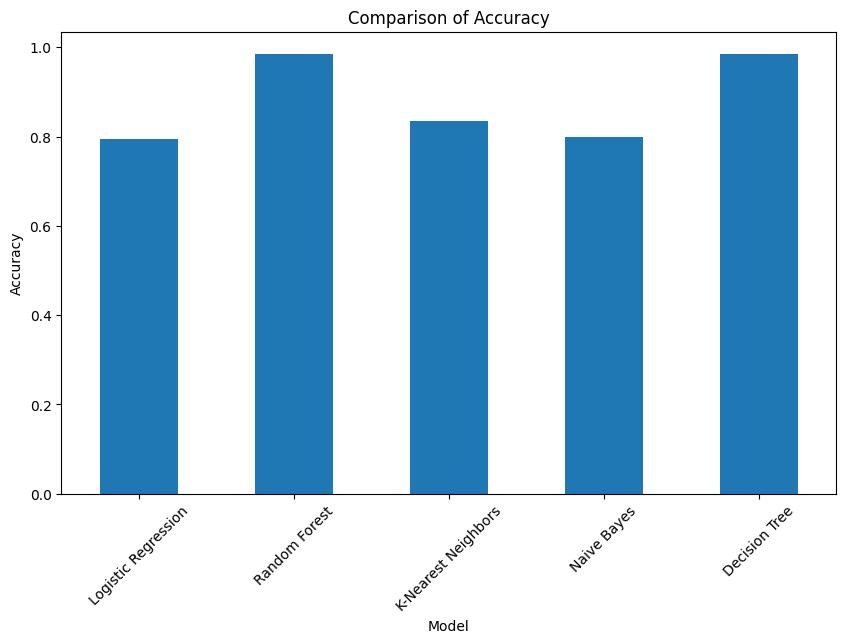

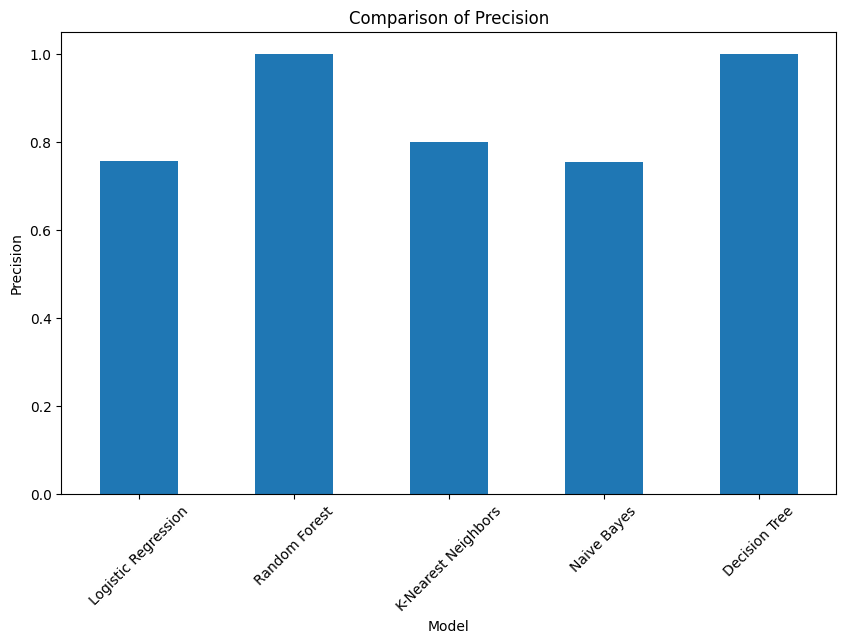

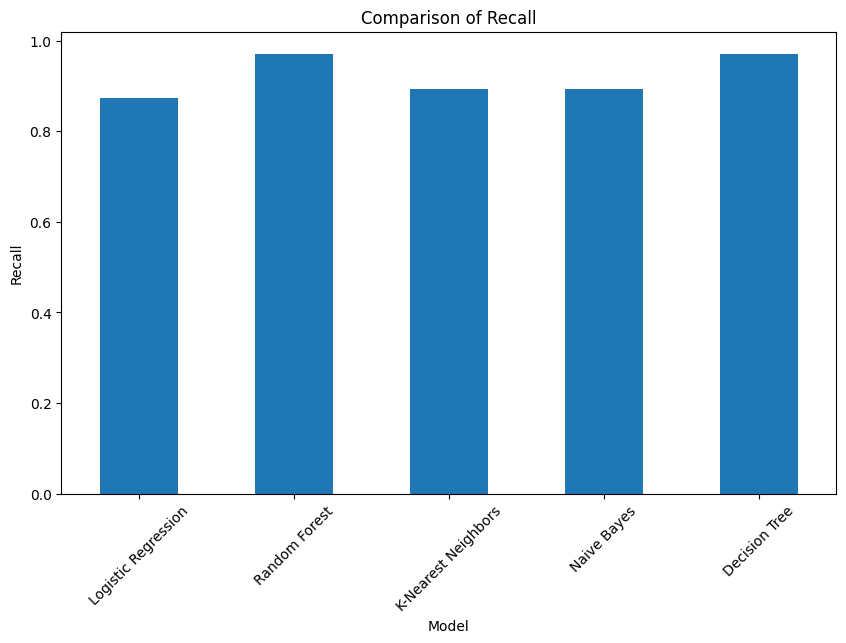

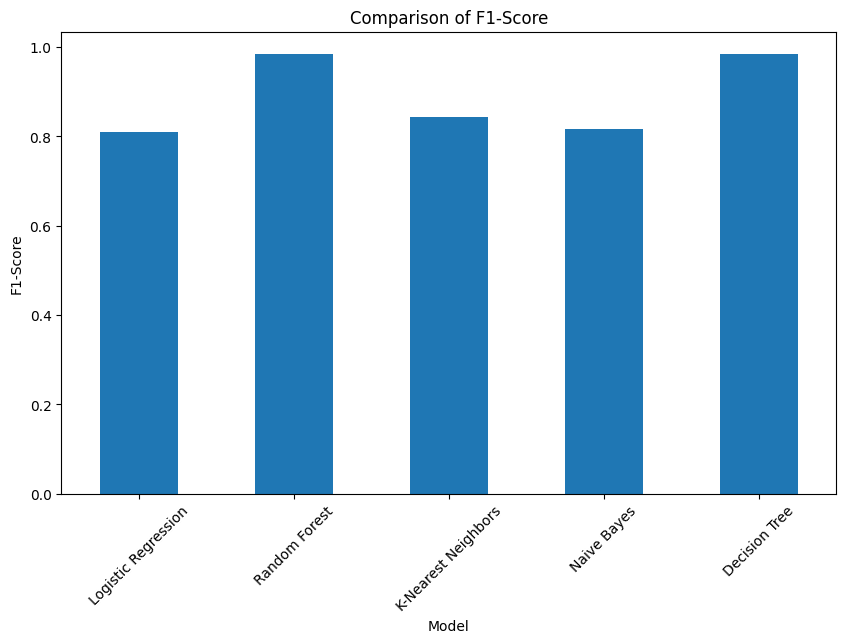

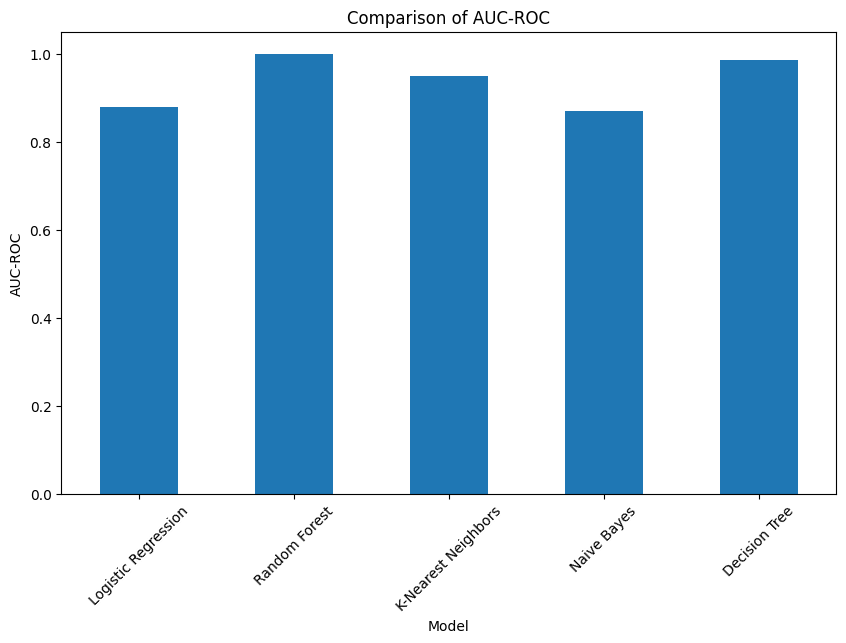

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load Dataset
# Replace "heart_disease.csv" with the path to your dataset
df = pd.read_csv("data.csv")  # Ensure the dataset is properly loaded

# Check dataset
print(df.head())

# Preprocess the Data
X = df.drop(columns=["target"])  # Replace "target" with the name of the target column
y = df["target"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and Evaluate Models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Probabilities

    # Calculate Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="binary")
    recall = recall_score(y_test, y_pred, average="binary")
    f1 = f1_score(y_test, y_pred, average="binary")
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # Store Results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC-ROC": auc
    })

# Create DataFrame for Results
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Plot Results
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]
for metric in metrics:
    results_df.plot(x="Model", y=metric, kind="bar", figsize=(10, 6), legend=False)
    plt.title(f"Comparison of {metric}")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()


Visualiation of linear regression

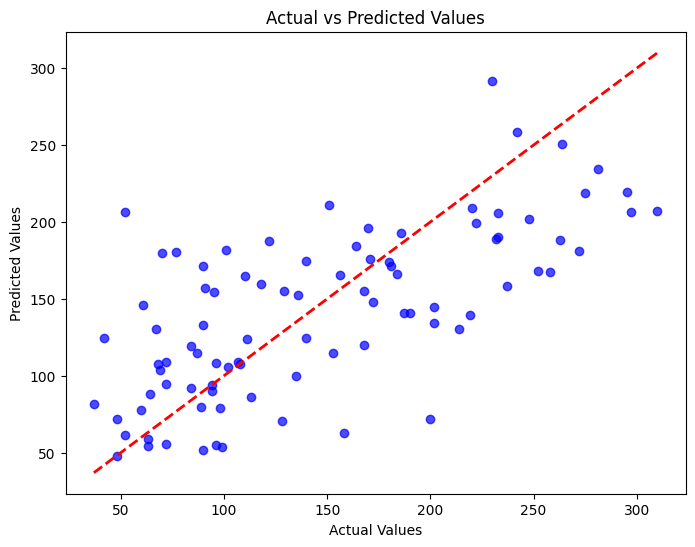

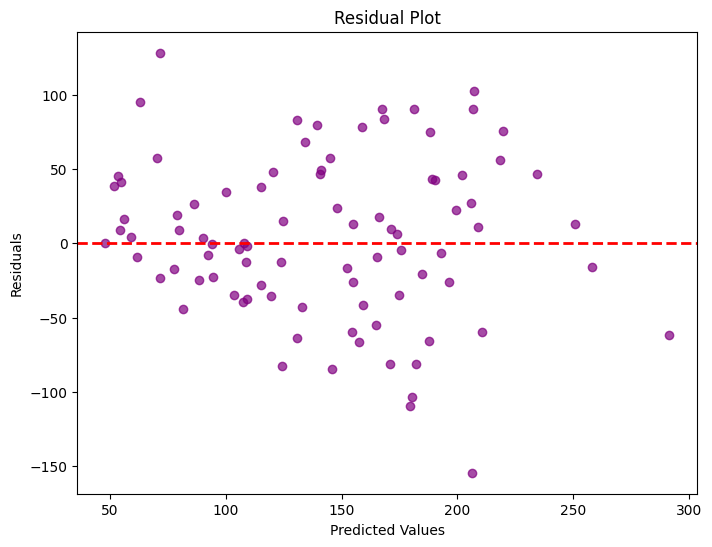

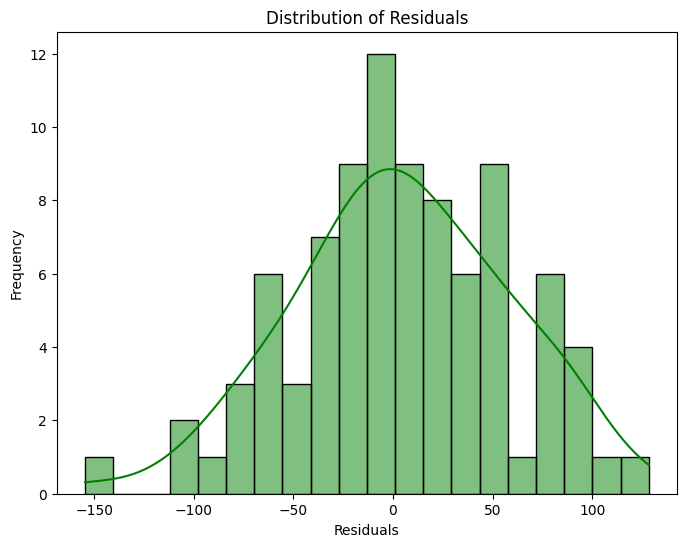

Model Performance:
Mean Squared Error (MSE): 2900.19
R² Score: 0.45


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Example Dataset: Replace this with your dataset
from sklearn.datasets import load_diabetes
data = load_diabetes(as_frame=True)
df = data.frame

# Define Features and Target
X = df.drop(columns=["target"])  # Replace "target" with the target column name
y = df["target"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate Residuals
residuals = y_test - y_pred

# 1. Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# 2. Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color="purple")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 3. Histogram or KDE of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="green", bins=20)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 4. Regression Line with Data Points (for Simple Linear Regression)
if X.shape[1] == 1:  # Check if it's a single feature
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, alpha=0.7, color="blue", label="Actual Data")
    plt.plot(X_test, y_pred, color="red", label="Regression Line")
    plt.title("Regression Line with Data Points")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.legend()
    plt.show()

# 5. Model Performance Metrics
print("Model Performance:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


visualiation of Random Forest

<ipython-input-3-08d8f49c2d60>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="viridis")


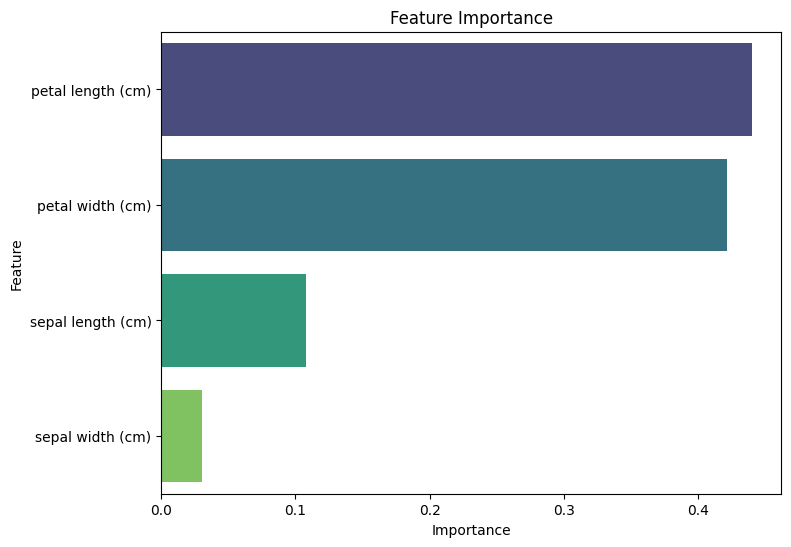

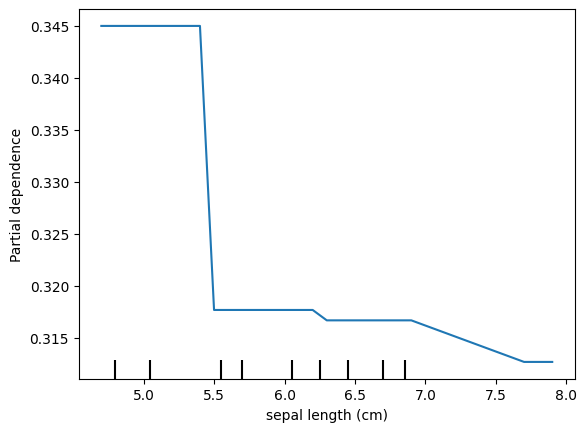

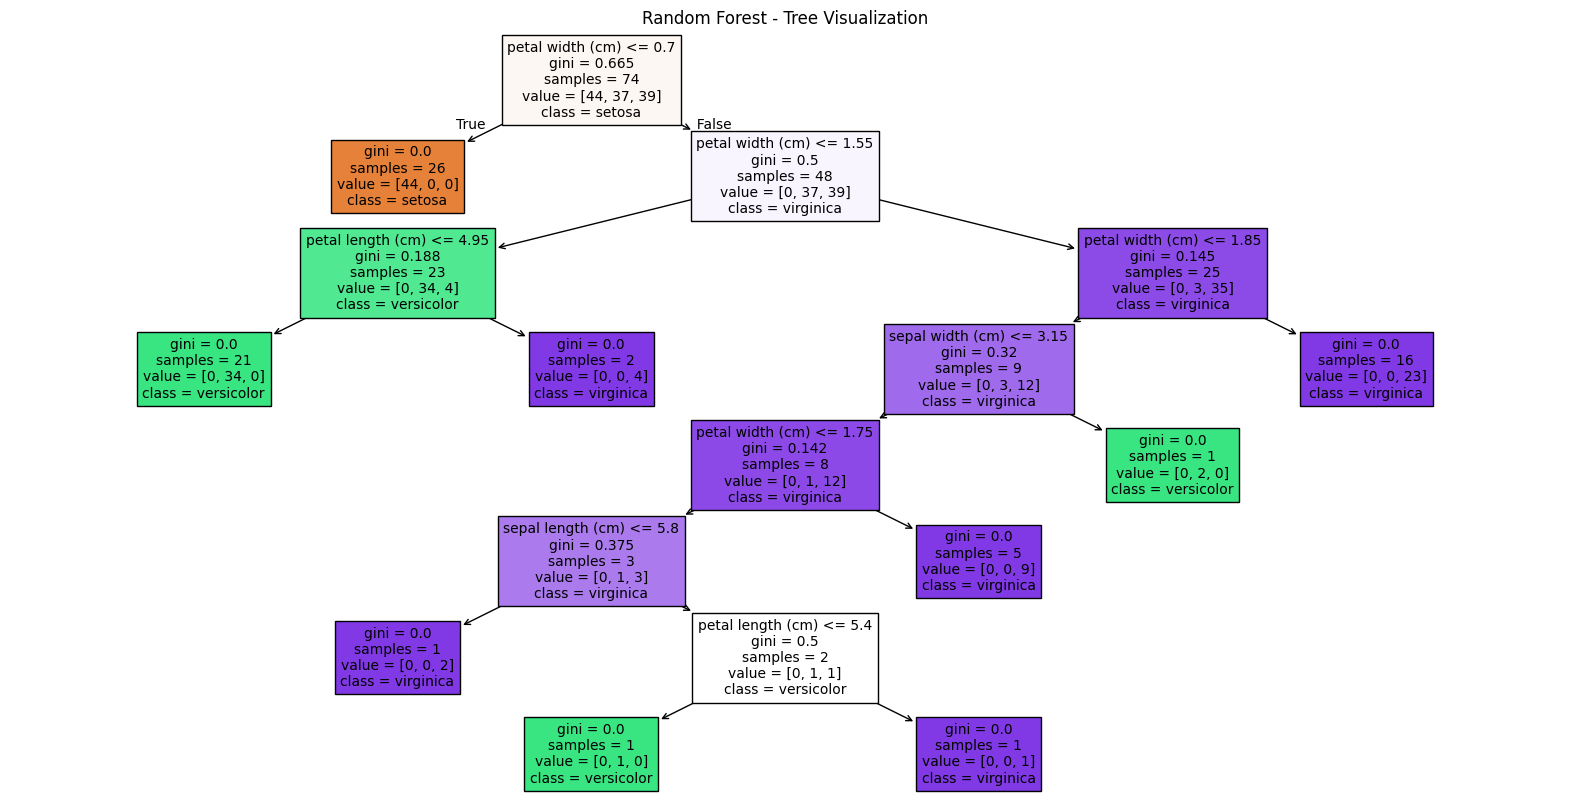

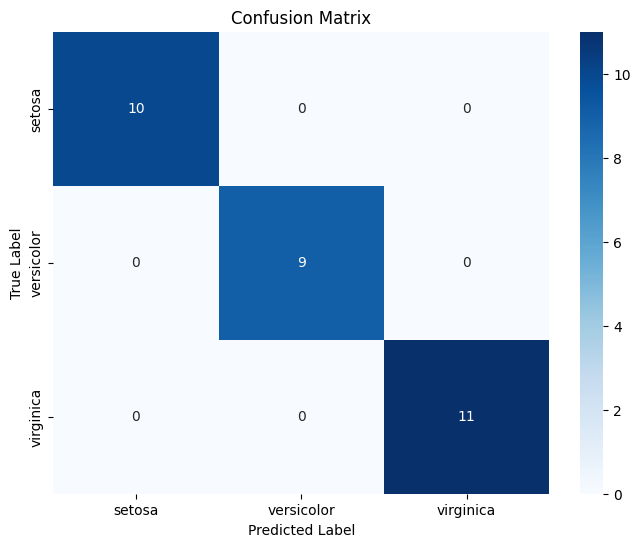

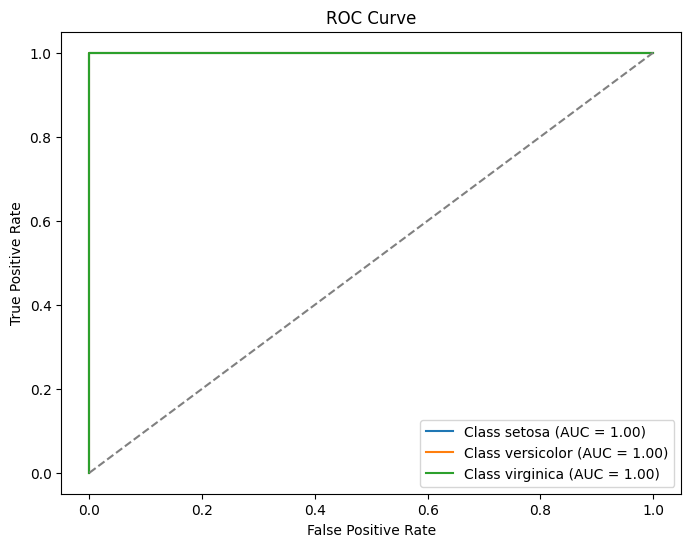

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.inspection import PartialDependenceDisplay
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

# Load Dataset
# Replace this with your dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)

# -----------------------------------------------
# 1. Feature Importance
# -----------------------------------------------
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# -----------------------------------------------
# 2. Partial Dependence Plot (PDP)
# -----------------------------------------------
# For large datasets, select a single feature to plot
PartialDependenceDisplay.from_estimator(rf_model, X_test, [0], feature_names=feature_names,target=0)
plt.show()

# -----------------------------------------------
# 3. Visualize a Single Tree
# -----------------------------------------------
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=feature_names, class_names=class_names, filled=True, fontsize=10)
plt.title("Random Forest - Tree Visualization")
plt.show()

# -----------------------------------------------
# 4. Confusion Matrix
# -----------------------------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -----------------------------------------------
# 5. ROC Curve (Multiclass Example)
# -----------------------------------------------
plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# -----------------------------------------------
# 6. Classification Report
# -----------------------------------------------
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


visualiation of decision tree

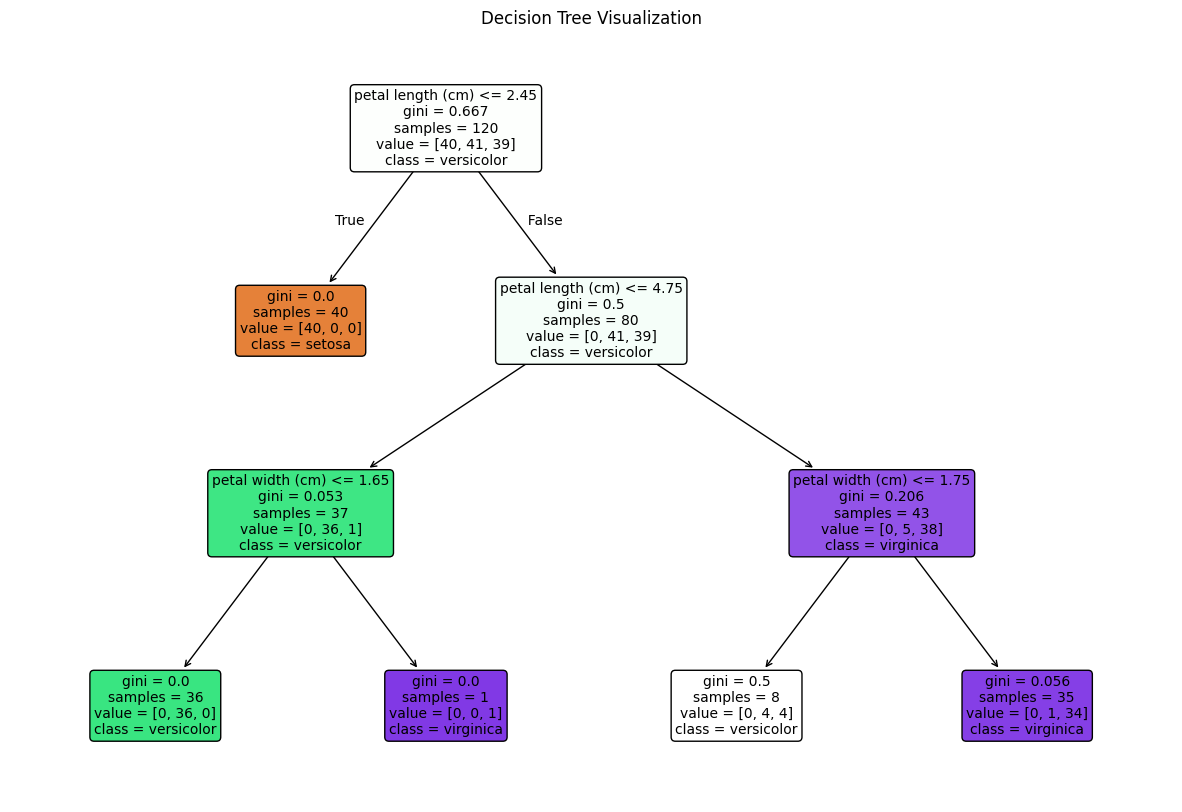

<ipython-input-4-a594af066d30>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="viridis")


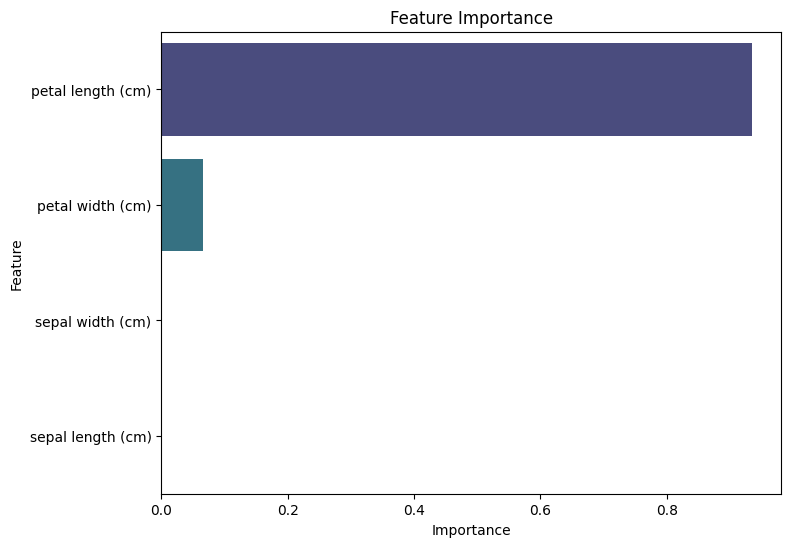

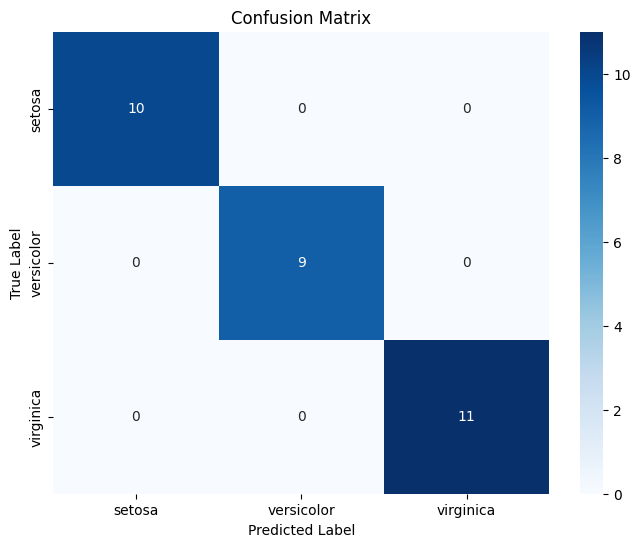

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load Dataset (Example: Iris Dataset)
# Replace this with your dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# -----------------------------------------------
# 1. Visualize the Decision Tree
# -----------------------------------------------
plt.figure(figsize=(15, 10))
plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

# -----------------------------------------------
# 2. Feature Importance Bar Chart
# -----------------------------------------------
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# -----------------------------------------------
# 3. Confusion Matrix
# -----------------------------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -----------------------------------------------
# 4. Classification Report
# -----------------------------------------------
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


visualization of KNN

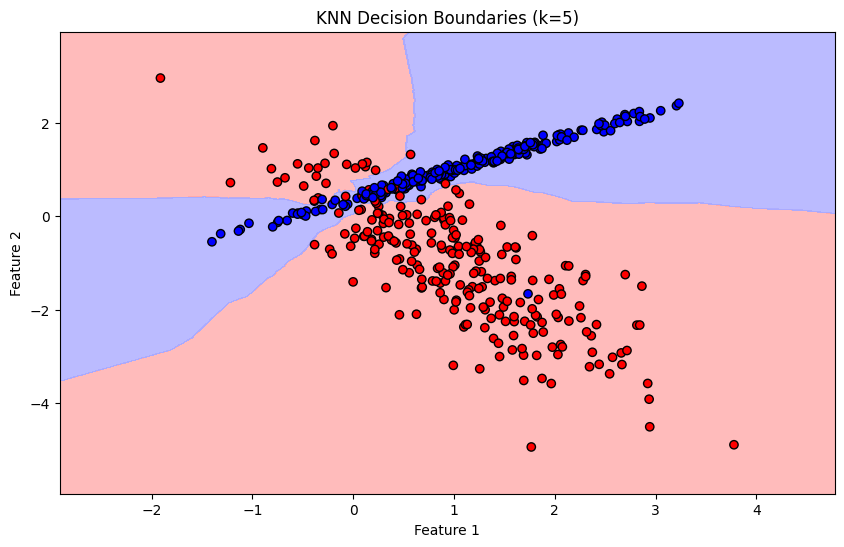

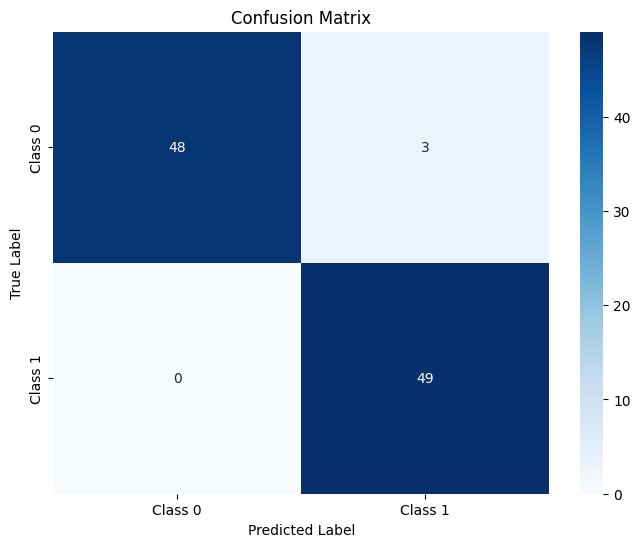

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        51
           1       0.94      1.00      0.97        49

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



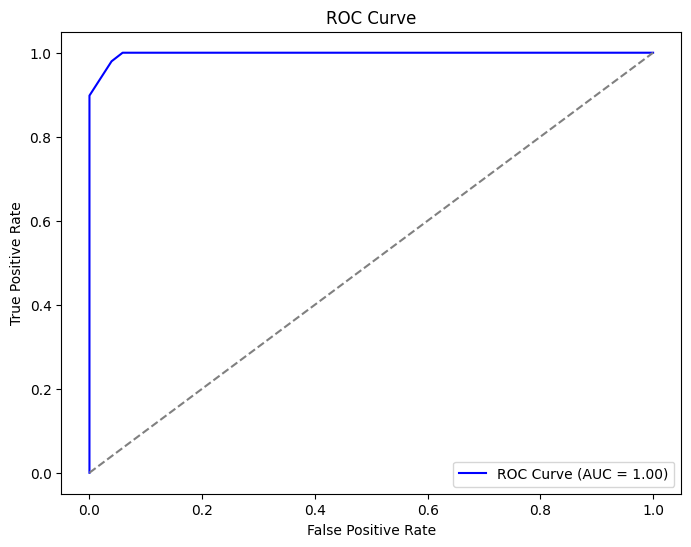

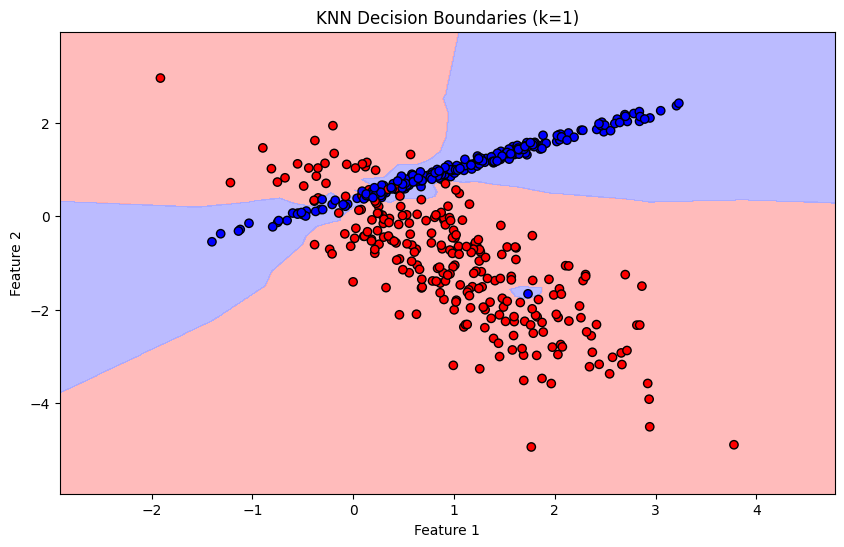

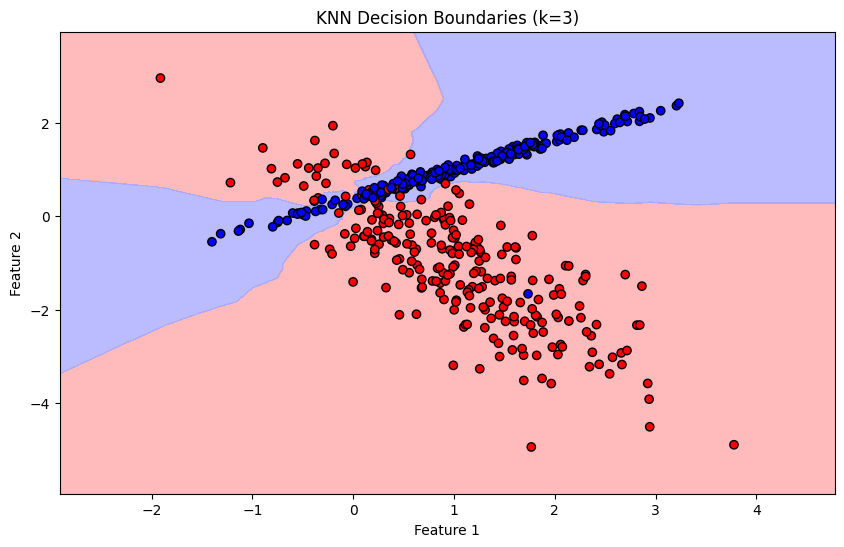

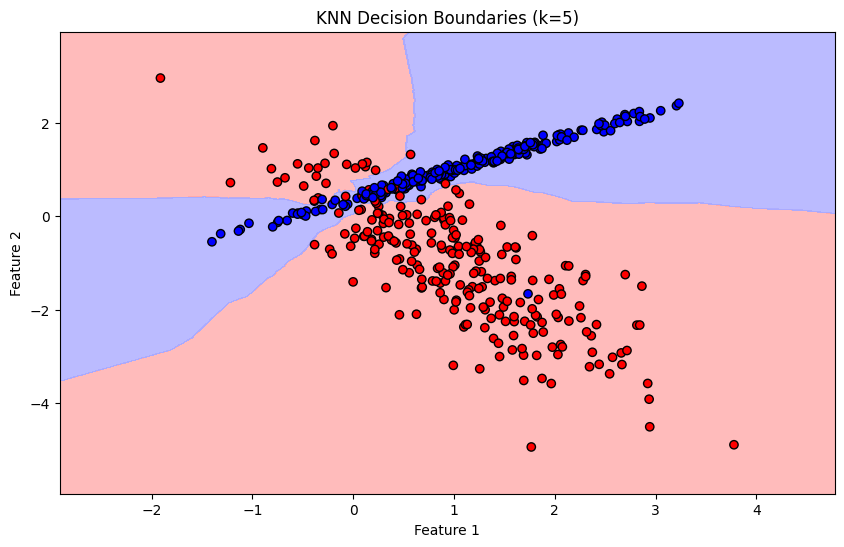

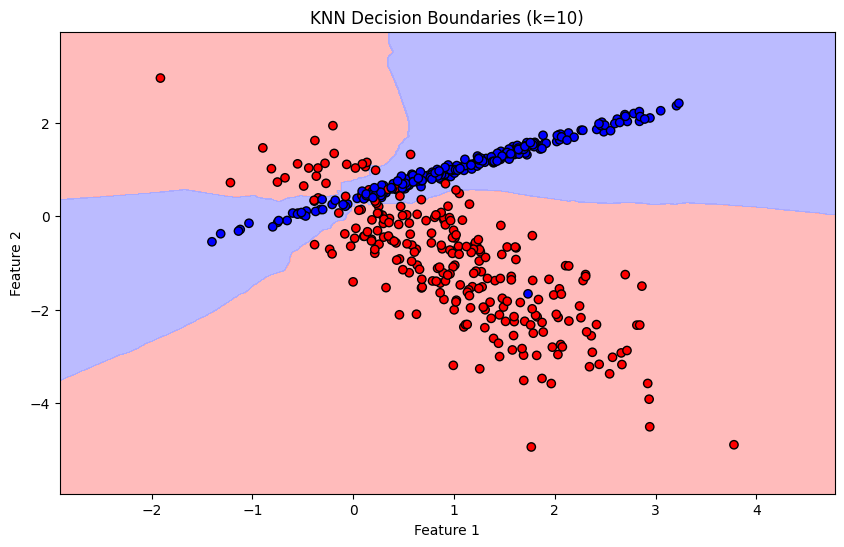

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from matplotlib.colors import ListedColormap

# Generate a Toy Dataset
# For visualization purposes, we use 2 features
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN Model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

# ------------------------------------------------
# 1. Visualize Decision Boundaries
# ------------------------------------------------
def plot_decision_boundaries(X, y, model, title="Decision Boundaries"):
    h = 0.01  # Step size for meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict class for every point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundaries(X, y, knn, title=f"KNN Decision Boundaries (k={k})")

# ------------------------------------------------
# 2. Confusion Matrix
# ------------------------------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ------------------------------------------------
# 3. Classification Report
# ------------------------------------------------
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ------------------------------------------------
# 4. ROC Curve
# ------------------------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# ------------------------------------------------
# 5. Effect of K on Decision Boundaries
# ------------------------------------------------
ks = [1, 3, 5, 10]
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_boundaries(X, y, knn, title=f"KNN Decision Boundaries (k={k})")


visualiation of Naive bayes

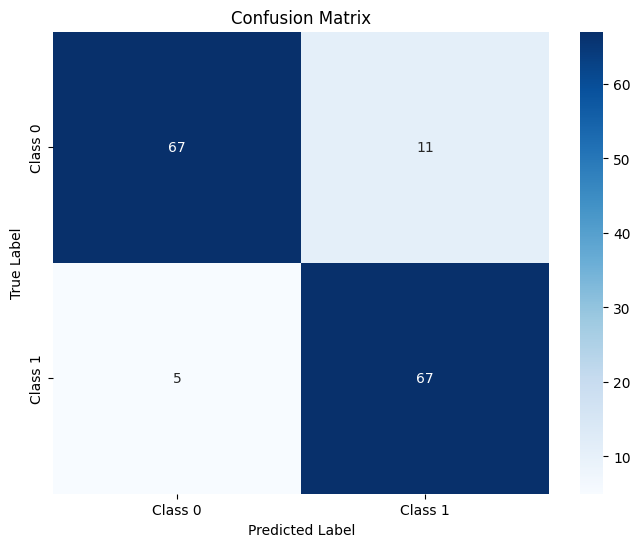

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        78
           1       0.86      0.93      0.89        72

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150



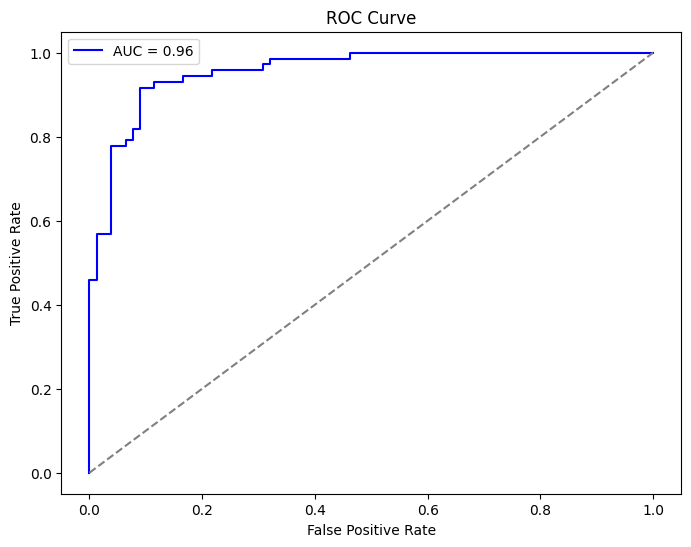

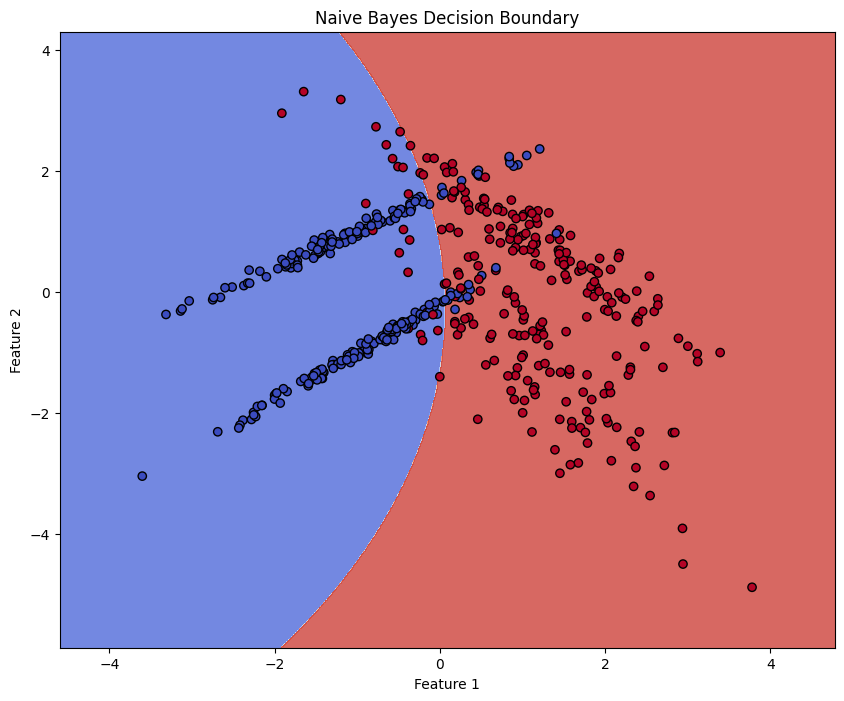

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification

# -----------------------------------------------
# Generate or Load Dataset
# -----------------------------------------------
# Using synthetic dataset for visualization
X, y = make_classification(
    n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42
)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------------------------
# Train Naive Bayes Model
# -----------------------------------------------
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)
y_prob = nb_model.predict_proba(X_test)

# -----------------------------------------------
# 1. Confusion Matrix
# -----------------------------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -----------------------------------------------
# 2. Classification Report
# -----------------------------------------------
print("Classification Report:")
print(classification_report(y_test, y_pred))

# -----------------------------------------------
# 3. ROC Curve
# -----------------------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# -----------------------------------------------
# 4. Decision Boundary Visualization
# -----------------------------------------------
# Only applicable for datasets with 2 features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="coolwarm")
plt.title("Naive Bayes Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


saving 5 models

In [ ]:
# Import necessary libraries
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Step 1: Create and train multiple models
# Generate synthetic dataset
X, y = make_classification(n_samples=500, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models
rf_model = RandomForestClassifier().fit(X_train, y_train)
lr_model = LogisticRegression().fit(X_train, y_train)
knn_model = KNeighborsClassifier().fit(X_train, y_train)
nb_model = GaussianNB().fit(X_train, y_train)
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

# Step 2: Save models into a dictionary
models = {
    "RandomForest": rf_model,
    "LogisticRegression": lr_model,
    "KNN": knn_model,
    "NaiveBayes": nb_model,
    "DecisionTree": dt_model
}

# Save all models in a single file
joblib.dump(models, 'all_models.pkl')
print("All models saved as 'all_models.pkl'.")

# Step 3: Load the models later
loaded_models = joblib.load('all_models.pkl')
print("Models loaded successfully!")

# Access specific models
rf_loaded = loaded_models["RandomForest"]
print("Random Forest model loaded and ready for use:", rf_loaded)


All models saved as 'all_models.pkl'.
Models loaded successfully!
Random Forest model loaded and ready for use: RandomForestClassifier()


saving to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount= True)

joblib.dump(models, '/content/drive/My Drive/all_models.pkl')
print("Models saved to Google Drive!")


Mounted at /content/drive
Models saved to Google Drive!


donload

In [ ]:
from google.colab import files
files.download('all_models.pkl')
print("Models file is available for download.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Models file is available for download.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
